# 3. Hadamard Test

In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

# remove some pesky warnings for using latex in python
import warnings
warnings.filterwarnings('ignore')

## Table of Contents

* [Introduction](#Introduction)
* [Proof](#Proof)
* [Verification](#Verification)
* [Error Analysis](#Error-Analysis)

## Introduction

Although a state's phase information is not accessible upon measurement, there are many applications that critically rely on access to this phase. The Hadamard test (HT) is a simple way to estimate the expectation value $\langle\psi|U|\psi\rangle$ of a unitary operator $U$ with respect to a quantum state $|\psi\rangle$. Though elementary in structure, the HT is the backbone of numerous state-of-the-art quantum algorithms for linear algebra, including those for matrix functions, Hamiltonian simulation, and singular value transformation. Since the expectation value is generally complex, its real and imaginary parts must be estimated separately using two circuit variants: the *real Hadamard test* and the *imaginary Hadamard test*.

Let $U \in \mathbb{C}^{n\times n}$ be unitary and define the phase gate $S = \sqrt{Z}$. The real and imaginary Hadamard tests (HT) are defined as the circuits depicted below in $\text{Fig. }1$.

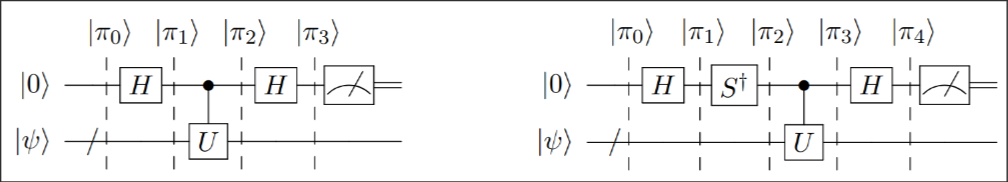

$\text{Figure 1}:\text{ Hadamard Test Circuits}$

<i>(Left) The real Hadamard test circuit and (Right) the imaginary Hadamard test circuit. $H$ is the Hadamard gate, $S$ is the phase gate, $U$ is a unitary gate. The topmost qubit starting in the sate $|0\rangle$ is the ancilla qubit, and the lower qubit(s) starting in the state $|\psi\rangle$ are the computation bits representing the eigenstate.</i>

The measurement of the control qubit in the real HT is represented by a random variable $X_\text{Re}$ which is permitted to be either $|0\rangle$ or $|1\rangle$. Instead of referencing this random variable directly, we use the shorthand notation:

$$\mathcal{P}_{{\rm{Re}}|0\rangle} 
:= \mathbb{P}(X_\text{Re} \in \{|0\rangle\}) 
\quad\text{and} \quad 
\mathcal{P}_{{\rm{Re}}|1\rangle} 
:= \mathbb{P}(X_\text{Re} \in \{|1\rangle\}).$$
Similarly, a random variable $X_\text{Im}$ being $|0\rangle$ or $|1\rangle$ describes the measurement of the control qubit in the imaginary HT, where we use the shorthand notation:
$$\mathcal{P}_{{\rm{Im}}|0\rangle} 
:= \mathbb{P}(X_\text{Im} \in \{|0\rangle\}) 
\quad\text{and} \quad 
\mathcal{P}_{{\rm{Im}}|1\rangle} 
:= \mathbb{P}(X_\text{Im} \in \{|1\rangle\}).$$

## Proof

### Real Hadamard Test <a name="RealHT"></a>

Looking at the real Hadamard test in the left panel of $\text{Fig. }1$, the intial state of the circuit can be written as

$$|\pi_0\rangle 
= |0\rangle \otimes |\psi\rangle 
= |0\rangle|\psi\rangle 
= \begin{pmatrix}1 \\ 0\end{pmatrix}|\psi\rangle$$

A Hadamard gate is then applied to the control qubit transforming it to the $|+\rangle$ state, i.e.,

$$|\pi_1\rangle 
= (H \otimes I) \cdot (|0\rangle|\psi\rangle)
= H|0\rangle I|\psi\rangle
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}|\psi\rangle
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\1 \end{pmatrix}|\psi\rangle
= \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle \right)|\psi\rangle 
= |+\rangle|\psi\rangle.$$

Next, a controlled-unitary gate applies the $U$ operation to $|\psi\rangle$ if and only if the control qubit is $|1\rangle$, i.e.,

$$|\pi_2\rangle 
= CU|+\rangle|\psi\rangle
= \frac{1}{\sqrt{2}}|0\rangle I|\psi\rangle + \frac{1}{\sqrt{2}} |1\rangle U|\psi\rangle 
= \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle U \right)|\psi\rangle.$$

The last operation is a Hadamard gate on the control qubit, resulting in the state

$$|\pi_3\rangle 
= (H\otimes I)\frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle U \right)|\psi\rangle 
= \frac{1}{2}\left(|0\rangle I|\psi\rangle + |1\rangle I|\psi\rangle + |0\rangle U |\psi\rangle - |1\rangle U|\psi\rangle \right)
= |0\rangle\frac{I+U}{2}|\psi\rangle + |1\rangle\frac{I-U}{2}|\psi\rangle.$$

With the final state of the system, the measurement probablities can be computed. The probability of measuring the control qubit to be in the $|0\rangle$ state is

$$\mathcal{P}_{\text{Re}|0\rangle}
= |\langle 0|\pi_3\rangle|^2 
=\left| \langle 0|0\rangle\frac{I+U}{2}|\psi\rangle + \langle0|1\rangle\frac{I-U}{2}|\psi\rangle\right|^2 
= \left|\frac{I+U}{2}|\psi\rangle\right|^2 
= \frac{\langle \psi|(I+U^{\dagger})(I+U)|\psi\rangle}{4} 
= \frac{\langle \psi|(I+U+U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4}.$$

Similarly, the probability of measuring the control qubit to be in the $|1\rangle$ state is

$$\mathcal{P}_{\text{Re}|1\rangle} 
= |\langle 1|\pi_3\rangle|^2 
= \left| \langle 1|0\rangle\frac{I+U}{2}|\psi\rangle + \langle 1|1\rangle\frac{I-U}{2}|\psi\rangle\right|^2 
= \left|\frac{I-U}{2}|\psi\rangle\right|^2 
= \frac{\langle \psi|(I-U^{\dagger})(I-U)|\psi\rangle}{4} 
= \frac{\langle \psi|(I-U-U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4}.$$

Since $U$ is unitary, these probabilities can be simplified further using the fact that $U^\dagger U = I$, i.e.,

$$\mathcal{P}_{\text{Re}|0\rangle} 
=  \frac{\langle \psi|(I+U+U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} 
= \frac{\langle \psi|(2I+U+U^{\dagger})|\psi\rangle}{4} 
= \frac{2 + \langle \psi|(U+U^{\dagger})|\psi\rangle}{4},$$

$$\mathcal{P}_{\text{Re}|1\rangle} 
=  \frac{\langle \psi|(I-U-U^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} 
= \frac{\langle \psi|(2I-U-U^{\dagger})|\psi\rangle}{4} 
= \frac{2 - \langle \psi|(U+U^{\dagger})|\psi\rangle}{4}.$$

For a unitary operator $U$, $\langle\alpha|U|\beta\rangle = (\langle\alpha|U|\beta\rangle)^\dagger = \langle\beta|U^{\dagger}|\alpha\rangle$. If $\alpha = \beta$, such as in our case, $\langle\psi|U|\psi\rangle^* = \langle\psi|U^{\dagger}|\psi\rangle$. Applying this and the fact that a number plus its complex conjugate is $2$ times the real part to our probablity equations, we find that

$$\mathcal{P}_{\text{Re}|0\rangle} 
= \frac{2 + \langle \psi|(U+U^{\dagger})|\psi\rangle}{4} 
= \frac{2 + 2\text{Re}\langle\psi|U|\psi\rangle}{4} 
= \frac{1}{2}(1+\text{Re}\langle\psi|U|\psi\rangle),$$

$$\mathcal{P}_{\text{Re}|1\rangle} 
= \frac{2 - \langle \psi|(U+U^{\dagger})|\psi\rangle}{4} 
= \frac{2 - 2\text{Re}\langle\psi|U|\psi\rangle}{4} 
= \frac{1}{2}(1-\text{Re}\langle\psi|U|\psi\rangle).$$
With the measurement probabilities for the real Hadamard test, we can
characterize the real part of the expectation value, i.e.,

$$\mathcal{P}_{\text{Re}|0\rangle} - \mathcal{P}_{\text{Re}|1\rangle}
= \frac{1}{2}(1+\text{Re}\langle\psi|U|\psi\rangle) - \frac{1}{2}(1-\text{Re}\langle\psi|U|\psi\rangle)
= \frac{1}{2}\text{Re}\langle\psi|U|\psi\rangle + \frac{1}{2}\text{Re}\langle\psi|U|\psi\rangle
=  \text{Re}\langle\psi|U|\psi\rangle,$$

$$2\mathcal{P}_{\text{Re}|0\rangle} - 1
= 2 \left(\frac{1}{2}(1+\text{Re}\langle\psi|U|\psi\rangle)\right) - 1
=  (1+\text{Re}\langle\psi|U|\psi\rangle)  - 1
=  \text{Re}\langle\psi|U|\psi\rangle,$$

$$1 - 2\mathcal{P}_{\text{Re}|1\rangle}
=  1 - 2 \left(\frac{1}{2}(1-\text{Re}\langle\psi|U|\psi\rangle)\right)
=  1-(1 -\text{Re}\langle\psi|U|\psi\rangle)
=  \text{Re}\langle\psi|U|\psi\rangle.$$

Therefore, the real expectation value can be found from these probabilities in the following three different ways:

$$\mathcal{P}_{\text{Re}|0\rangle} - \mathcal{P}_{\text{Re}|1\rangle} = 2\mathcal{P}_{\text{Re}|0\rangle} - 1 = 1 - 2\mathcal{P}_{\text{Re}|1\rangle} =\text{Re}\langle\psi|U|\psi\rangle.$$

### Imaginary Hadamard Test <a name="ImagHT"></a>

The approach to obtain the imaginary part of the expectation value is almost exactly the same as the real part. This time, though, we will use the imaginary Hadamard test circuit which contains the addition of a phase gate $S^{\dagger} = \begin{pmatrix} 1 & 0\\0 & -i\end{pmatrix}$ on the control qubit as shown in $\text{Fig. }1$. 

The first two states $|\pi_0\rangle$ and $|\pi_1\rangle$ are the same as for the real test,

$$|\pi_0\rangle 
= |0\rangle|\psi\rangle
= \begin{pmatrix}1\\0\end{pmatrix}|\psi\rangle,$$

$$|\pi_1\rangle 
= H|0\rangle|\psi\rangle 
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}\begin{pmatrix}1\\0\end{pmatrix}|\psi\rangle 
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\1 \end{pmatrix}|\psi\rangle 
= \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle \right)|\psi\rangle 
= |+\rangle|\psi\rangle.$$

Now the phase gate $S^{\dagger}$ is applied giving the state

$$|\pi_2\rangle 
= S^{\dagger}|+\rangle|\psi\rangle 
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0\\0 & -i\end{pmatrix}\begin{pmatrix} 1\\1\end{pmatrix}|\psi\rangle 
= \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\-i\end{pmatrix}|\psi\rangle 
= \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle \right)|\psi\rangle = |-i\rangle|\psi\rangle.$$

Performing the controlled-$U$ operation results in the state

$$|\pi_3\rangle 
= CU|-i\rangle|\psi\rangle 
= \frac{1}{\sqrt{2}}\left(|0\rangle I|\psi\rangle - i|1\rangle U|\psi\rangle\right)
= \frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle U\right)|\psi\rangle.$$

Lastly, the second Hadamard gate is applied to the control qubit which gives the state

$$|\pi_4\rangle
= (H\otimes I)\frac{1}{\sqrt{2}}\left(|0\rangle - i|1\rangle U\right)|\psi\rangle
= \frac{1}{2}\left[|0\rangle I + |1\rangle I - i|0\rangle U - i|1\rangle U\right]|\psi\rangle 
= |0\rangle\frac{I-iU}{2}|\psi\rangle + |1\rangle\frac{I+iU}{2}|\psi\rangle.$$

Using the same approach as for the real test, the probability of measuring the control qubit to be in the $|0\rangle$ state is

$$\mathcal{P}_{\text{Im}|0\rangle} 
= |\langle 0|\pi_3\rangle |^2 
= \left|\langle 0|0\rangle\frac{I-iU}{2} + \langle 0|1\rangle\frac{I+iU}{2}|\psi\rangle|\psi\rangle\right|^2 
= \left|\frac{I-iU}{2}|\psi\rangle\right|^2 
= \frac{\langle \psi|(I+iU^{\dagger})(I-iU)|\psi\rangle}{4} 
= \frac{\langle \psi|(I-iU+iU^{\dagger}+U^{\dagger}U)|\psi\rangle}{4}.$$

The probability of measuring the control qubit to be in the $|1\rangle$ state is

$$\mathcal{P}_{\text{Im}|1\rangle} 
= |\langle 1 | \pi_3 \rangle|^2 
= \left|\langle 1|0\rangle\frac{I-iU}{2} + \langle 1|1\rangle\frac{I+iU}{2}|\psi\rangle\right|^2 
= \left|\frac{I+iU}{2}|\psi\rangle\right|^2 
= \frac{\langle \psi|(I-iU^{\dagger})(I+iU)|\psi\rangle}{4} 
= \frac{\langle \psi|(I+iU-iU^{\dagger}+U^{\dagger}U)|\psi\rangle}{4}.$$

These probabilities can again be simplified further using similar steps to the real circuit, i.e.,

$$\mathcal{P}_{\text{Im}|0\rangle} 
=  \frac{\langle \psi|(I-iU+iU^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} 
= \frac{2-\langle \psi|iU|\psi\rangle+\langle \psi|iU^{\dagger}|\psi\rangle}{4} 
= \frac{1}{2}+i\frac{-\langle \psi|U|\psi\rangle+\langle \psi|U^{\dagger}|\psi\rangle}{4}
= \frac{1}{2}+ \frac{2\text{Im}\langle\psi|U|\psi\rangle}{4} 
= \frac{1}{2}(1 + \text{Im}\langle\psi|U|\psi\rangle),$$

$$\mathcal{P}_{\text{Im}|1\rangle} 
=  \frac{\langle \psi|(I+iU-iU^{\dagger}+U^{\dagger}U)|\psi\rangle}{4} 
= \frac{2+\langle \psi|iU|\psi\rangle-\langle \psi|iU^{\dagger}|\psi\rangle}{4} 
= \frac{1}{2}+i\frac{\langle \psi|U|\psi\rangle-\langle \psi|U^{\dagger}|\psi\rangle}{4} 
= \frac{1}{2} - \frac{2\text{Im}\langle\psi|U|\psi\rangle}{4} 
= \frac{1}{2}(1 - \text{Im}\langle\psi|U|\psi\rangle).$$

Following the same rules mentioned for the real test, subtracting $\mathcal{P}_{\text{Im}|1\rangle}$ from $\mathcal{P}_{\text{Im}|0\rangle}$ will give the imaginary part of the expectation value $\text{Im}\langle\psi|U|\psi\rangle$, i.e.,
$$\mathcal{P}_{\text{Im}|0\rangle} - \mathcal{P}_{\text{Im}|1\rangle} 
= \frac{1}{2}(1 + {\rm Im}\langle\psi|U|\psi\rangle) - \frac{1}{2}(1 - {\rm Im}\langle\psi|U|\psi\rangle) 
= {\rm Im}\langle\psi|U|\psi\rangle.$$

Therefore, the imaginary part of the expectation value can be found in the following three ways:
$$\mathcal{P}_{\text{Im}|0\rangle} - \mathcal{P}_{\text{Im}|1\rangle} 
= 1 - 2\mathcal{P}_{\text{Im}|1\rangle} 
= 2\mathcal{P}_{\text{Im}|0\rangle} - 1 
= \text{Im}\langle\psi|U|\psi\rangle.$$

By combining these real and imaginary results, the expectation value $\langle\psi|U|\psi\rangle$ can be estimated.
 

### Recovering the Phase

Recall that the eigenvalues of $U$ are of the form
$$\lambda 
= e^{i\theta} 
= \cos\theta + i\sin\theta,$$
and thus $\text{Re}\langle\psi|U|\psi\rangle = \cos\theta$. So the real probabilities can be written as
$$\mathcal{P}_{{\rm{Re}}|0\rangle} = \frac{1}{2}(1+\cos\theta) \quad \text{and} \quad \mathcal{P}_{{\rm{Re}}|1\rangle} = \frac{1}{2}(1-\cos\theta),$$
hence,
$$\theta = \arccos(2\mathcal{P}_{{\rm{Re}}|0\rangle} - 1) = \arccos(1 - 2\mathcal{P}_{{\rm{Re}}|1\rangle}).$$
Similarly, $\text{Im}\langle\psi|U|\psi\rangle = \sin\theta$. Thus, $\theta$ can also be estimated by
$$\theta = \arcsin(2\mathcal{P}_{{\rm{Im}}|0\rangle} - 1) = \arcsin(1 - 2\mathcal{P}_{{\rm{Im}}|1\rangle}).$$

Finally, $\theta$ can be estimated using both the real and imaginary parts of the expectation value. Each part can be thought of as a vector on the complex unit circle with the real part on the $x$-axis and the imaginary part on the $y$-axis. Taking the $\arcsin$ of the imaginary part or the $\arccos$ of the real part is effectively calculating the vector of the entire complex expectation value. This means that the $\arctan$ of the imaginary part over the real part also gives $\theta$.    
Therefore, the angle $\theta$ can be estimated with the following three methods:
$$\theta = \arccos(\text{Re}\langle\psi|U|\psi\rangle) = \arcsin(\text{Im}\langle\psi|U|\psi\rangle) = \arctan\left(\frac{\text{Im}\langle\psi|U|\psi\rangle}{\text{Re}\langle\psi|U|\psi\rangle}\right).$$

Note that using both the real and imaginary parts of the expectation value to estimate $\theta$ with $\arctan$ increases the error of the estimation, since it uses data from two random variables rather than just one.

## Verification

 We now exemplify the Hadamard test in practice using Qiskit $2.0.0$ alongside AerSimulator. Consider the unitary matrix
$$U = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix}, \quad \text{with} \quad \theta = \frac{1}{2} + \frac{1}{2^4} = 0.5625.$$
We estimate $\theta$ by applying both the real and imaginary Hadamard tests and measuring $1000$ shots

In [19]:
angle = 0.5625 # exact value of theta to estimate
shots = 1000   # number of times the obserable is measured
print("Angle: ",angle, "rad")

Angle:  0.5625 rad


In [20]:
def re_HT(theta):
    circuit = QuantumCircuit(2,1)
    # Initialize the input statevector with a pauli x gate 
    circuit.x(1)
    circuit.barrier(label='$|π_0$\u27e9')    
    # Apply hadamard gate to the ancilla bit to put it into + state
    circuit.h(0)
    circuit.barrier(label='$|π_1$\u27e9') 
    # Apply the unitary operation specified above as a controlled operation on the ancilla qubit
    circuit.cp(theta,0,1) 
    circuit.barrier(label='$|π_2$\u27e9') 
    # Apply second hadamard gate the acnilla bit
    circuit.h(0) 
    circuit.barrier(label='$|π_3$\u27e9')
    # measure q0 to the classical bit c0
    circuit.measure(0,0)
    return circuit

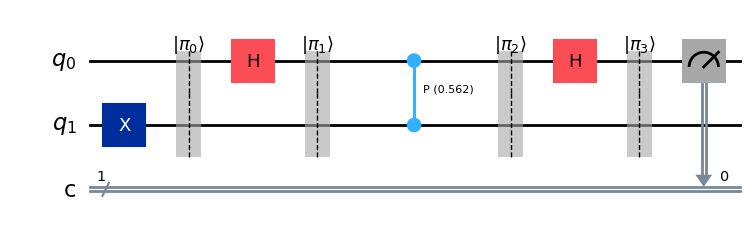

In [21]:
qcRe = re_HT(angle)
qcRe.draw('mpl')

In [22]:
def im_HT(theta):
    circuit = QuantumCircuit(2,1)
    # Initialize the input statevector with a pauli x gate 
    circuit.x(1)
    circuit.barrier(label='$|π_0\u27e9$')
    # Apply hadamard gate to the ancilla bit to put it into + state
    circuit.h(0)
    circuit.barrier(label='$|π_1$\u27e9')
    # Apply phase gate to measure the imaginary part of observable
    circuit.sdg(0)
    circuit.barrier(label='$|π_2$\u27e9')
    # Apply the unitary operation specified above as a controlled operation on the ancilla qubit
    circuit.cp(theta,0,1)
    circuit.barrier(label='$|π_3$\u27e9')
    # Apply second hadamard gate the acnilla bit
    circuit.h(0)
    circuit.barrier(label='$|π_4$\u27e9')
    # measure q0 to the classical bit c0
    circuit.measure(0,0)
    return circuit

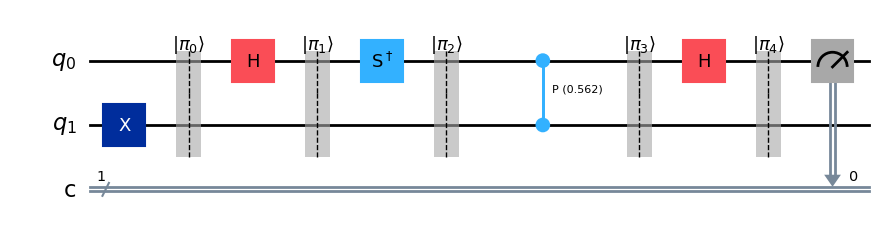

In [23]:
qcIm = im_HT(angle)
qcIm.draw('mpl')

In [24]:
sim = AerSimulator()

In [25]:
transRe = transpile(qcRe, sim)
resultRe = sim.run(transRe, shots = shots).result()
countsRe = resultRe.get_counts()

In [26]:
transIm = transpile(qcIm, sim)
resultIm = sim.run(transIm, shots = shots).result()
countsIm = resultIm.get_counts()

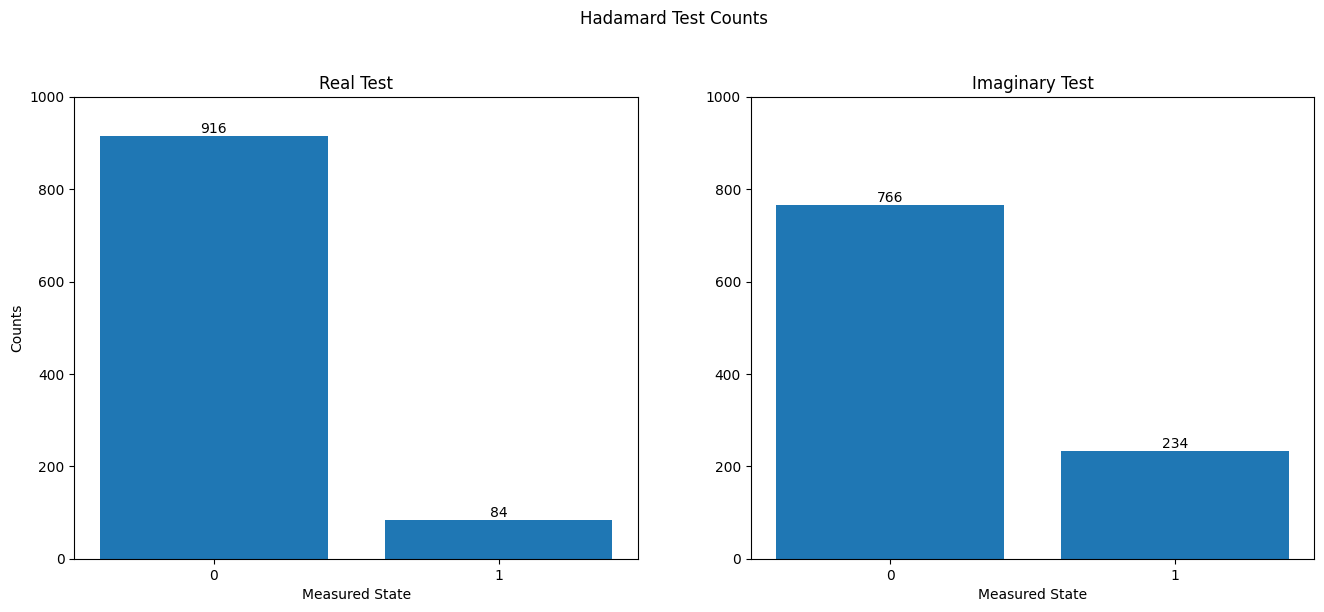

In [27]:
# plot real and imaginary hadamard test counts

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
bar0 = axes[0].bar([0,1], [countsRe.get('0'), countsRe.get('1')])

axes[0].bar_label(bar0, fmt = lambda x: int(x))
axes[0].set_xticks([0,1])
axes[1].set_xticks([0,1])

bar1 = axes[1].bar([0,1], [countsIm.get('0'), countsIm.get('1')])
axes[1].bar_label(bar1, fmt = lambda x: int(x))

axes[0].set_ylim(0,shots)
axes[1].set_ylim(0,shots)

axes[0].set_xlabel('Measured State')
axes[1].set_xlabel('Measured State')
axes[0].set_ylabel('Counts')
axes[0].set_title('Real Test')
axes[1].set_title('Imaginary Test')

fig.suptitle('Hadamard Test Counts', y=1.025)
plt.show()

Using our computed equations for the measurement probability, the theoretical probabilities of measuring the control qubit of the real Hadamard test to be in the states $|0\rangle$ and $|1\rangle$ are
$$\mathcal{P}_{{\rm{Re}}|0\rangle} 
= \frac{1}{2}(1+\cos(0.5625)) \approx 0.9230 
\quad \text{and} \quad 
\mathcal{P}_{{\rm{Re}}|1\rangle} 
= \frac{1}{2}(1-\cos(0.5625)) \approx 0.0770.$$
The theoretical probabilities of measuring the control qubit of the imaginary Hadamard test to be in the states $|0\rangle$ and $|1\rangle$ are
$$\mathcal{P}_{{\rm{Im}}|0\rangle} 
= \frac{1}{2}(1+\sin(0.5625)) \approx 0.7667
\quad \text{and} \quad 
\mathcal{P}_{{\rm{Im}}|1\rangle} 
= \frac{1}{2}(1-\sin(0.5625)) \approx 0.2333.$$

Though the theoretical and experimental values are usually similar, there is a discrepancy between the ideal HTs and a using the HTs with $1000$ shots as shown below.

In [37]:
print('For Real Part:')
print('Calculated probability of measuring 0:\t',0.5*(1 + np.cos(angle)))
print('Calculated probability of measuring 1:\t', 0.5*(1 - np.cos(angle)))
print('Actual Probability of measuring 0:\t', countsRe['0']/shots)
print('Actual Probability of measuring 1:\t', countsRe['1']/shots)

print()

print('For Imaginary Part:')
print('Calculated probability of measuring 0:\t',0.5*(1 + np.sin(angle)))
print('Calculated probability of measuring 1:\t', 0.5*(1 - np.sin(angle)))
print('Actual Probability of measuring 0:\t', countsIm['0']/shots)
print('Actual Probability of measuring 1:\t', countsIm['1']/shots)

For Real Part:
Calculated probability of measuring 0:	 0.922962249615534
Calculated probability of measuring 1:	 0.07703775038446603
Actual Probability of measuring 0:	 0.916
Actual Probability of measuring 1:	 0.084

For Imaginary Part:
Calculated probability of measuring 0:	 0.7666513367680101
Calculated probability of measuring 1:	 0.23334866323198994
Actual Probability of measuring 0:	 0.766
Actual Probability of measuring 1:	 0.234


Note that these probabilities both sum to $1$ as expected. If we cycle through values of $\theta$ from $0\text{ rad}$ to $2\pi\text{ rad}$ and plot the probabilities of measuring $|0\rangle$ or $|1\rangle$, we can see that they in fact always sum to 1.

In [29]:
angles = np.linspace(0, 2*pi, 35) # create array of evenly spaced angles from 0 - 2 pi
prob0 = []
prob1 = []
for ang in angles:
    circ = re_HT(ang)
    shots = int(shots)
    trans = transpile(circ, sim) # transpile real hadamard test circuit
    result = sim.run(trans, shots = shots).result() # run transpiled circuit
    counts = result.get_counts() # retreive counts after measurement
    prob0val = counts.get('0')
    prob1val = counts.get('1')
    # compute probabilities from counts and append to a list
    if prob0val is not None and prob1val is not None:        
        prob0.append(counts['0']/shots)
        prob1.append(counts['1']/shots)
    elif prob0val is None:
        prob0.append(0)
        prob1.append(counts['1']/shots)
    elif prob1val is None:
        prob1.append(0)
        prob0.append(counts['0']/shots)

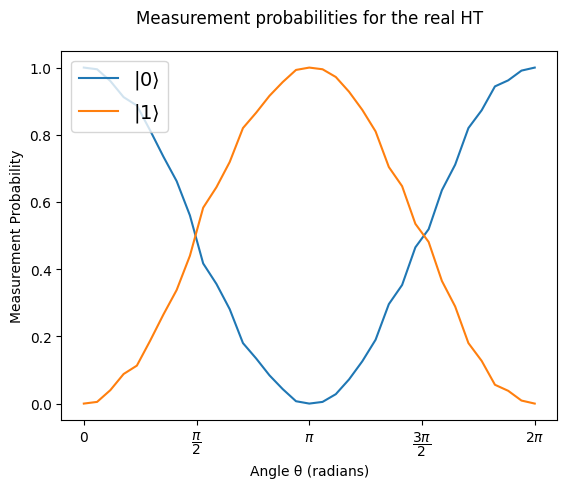

In [30]:

plt.plot(angles, prob0, label = '|0$\u27e9$')
plt.plot(angles, prob1, label = '|1$\u27e9$')
plt.xticks([0,0.5*pi, pi, 1.5*pi, 2*pi],['0','$\dfrac{\pi}{2}$','$\pi$','$\dfrac{3 \pi}{2}$','$2 \pi$'])
plt.xlabel('Angle \u03B8 (radians)')
plt.ylabel('Measurement Probability')
plt.title('Measurement probabilities for the real HT', pad = 20)
plt.legend(loc = 'upper left', prop={'size': 14})
plt.show()

With the probabilities for each circuit, $\text{Re}\langle\psi|U|\psi\rangle$ and $\text{Im}\langle\psi|U|\psi\rangle$ can be found using any of the equations mentioned above. This gives the expecation values
$$\text{Re}\langle\psi|U|\psi\rangle 
= 0.850 
\quad \text{and} \quad 
\text{Im}\langle\psi|U|\psi\rangle 
= 0.536.$$

In [31]:
print("Results of the Trial: ") # display counts for both circuits
print("Real Circuit:\t\t",countsRe)
print("Imginary Circuit:\t",countsIm)

# obtain probabilities from counts
re_p0 = countsRe['0']/shots
re_p1 = countsRe['1']/shots
im_p0 = countsIm['0']/shots
im_p1 = countsIm['1']/shots

# compute the real and imaginary expectation values
# any of the commented equations can be used
re = re_p0 - re_p1
#re = 2*(re_p0) - 1
#re = 1 - 2*(re_p1)

im = im_p0 - im_p1
#im = 2*(im_p0) - 1
#im = 1 - 2*(im_p1)

print('\nRe\u27e8\u03c8|U|\u03c8\u27e9 = ',re) # display both the real and imaginary expectation values 
print('Im\u27e8\u03c8|U|\u03c8\u27e9 = ',im)

Results of the Trial: 
Real Circuit:		 {'0': 916, '1': 84}
Imginary Circuit:	 {'0': 766, '1': 234}

Re⟨ψ|U|ψ⟩ =  0.8320000000000001
Im⟨ψ|U|ψ⟩ =  0.532


Since trigonometric functions are cyclic, inverse trigonometric functions have multiple possible values of $\theta$ that they can return. The standard for these types of function is to return the value closest to zero, which is not necessarily the true phase. Therefore, the outputs of both $\arccos$ and $\arcsin$ are used to determine which quadrant the phase is in. The function $\arccos$ ranges from $0$ to $\pi$, and $\arcsin$ from $-\pi/2$ to $\pi/2$. $\arccos$ is used to determine whether the angle is in the positive $x$ or negative $x$ part of the graph, and $\arcsin$ is used to determine if it is in the positive $y$ or negative $y$ part of the graph. Using the angle returned from $\arccos$, if $\arcsin$ gives a negative value, then the angle must be found in the negative $y$ part of the graph. To do this, the estimated angle can be set to $2\pi-\theta$. Using the angle returned from $\arcsin$, if $\arccos$ gives a value greater than $\pi/2$, then the angle must be determined in the negative $x$ part of the graph. To do this, the estimated angle is set to $\pi-\theta$. For a graphical explanation we refer the reader to <a href="https://www.desmos.com/calculator/oebpz5tpyt">here</a>.

In [32]:
# specify which way to determine angle using equation number: 
#       1 -> use cosine to determine angle and sine to determine sign
#       2 -> use sine to determine angle and cosine to determine sign
#       3 -> use tan to determine angle
equation_number = 1 

In [33]:
# calculate phase
ans = 0
if equation_number == 1:
    cos_angle = np.arccos(re)
    if  np.arcsin(im)<0:
        ans = 2*pi - cos_angle
    else:
        ans = cos_angle
elif equation_number == 2:
    sin_angle = np.arcsin(im)
    if  np.arccos(re)>pi/2:
        ans = pi - sin_angle
    else:
        ans = sin_angle
else:
    ans = np.arctan2(im,re)

# adjust angle to be positive
if ans < 0: ans = ans + 2*pi
print("\nEstimated phase angle:\t", ans)
print("Exact phase angle:\t", angle)


Estimated phase angle:	 0.5880932667898044
Exact phase angle:	 0.5625


This example estimated the phase angle $\theta = 0.5625$ to be $\theta = 0.5548$. The accuracy of this estimation is directly dependent on the number of shots, which is how many times the circuit is run. The more shots used, the more accurate the probabilities will be and thus the expectation values and phase angle will be estimated to higher precision. Next, we will connect the convergence behavior to Monte-Carlo type estimators providing a rate of convergence for the HTs.

## Error Analysis

In quantum computing, repeated measurements—known as shots—are used to estimate the probability of a quantum system collapsing into a given state. This is inherently a statistical process: each measurement samples from an underlying probability distribution that is not directly accessible. To infer this distribution, we employ tools from statistical estimation, most notably the empirical distribution function (EDF), which approximates the true distribution based on a finite number of observations. This forms the foundation for quantifying the accuracy and convergence of algorithms like the HTs.

Each single-qubit measurement of the control qubit yields a Bernoulli random variable $X\in \{0,1\}$, with success probability $p=P(X=0)$. For $N_s$ independent shots, the EDF is defined as 
$$\hat{F}(x) = \frac{1}{N_s}\sum_{i=1}^{N_s}𝟙_{\{X_i\leq x\}},$$
where $X_i \sim X$ are i.i.d. and are corresponding to each measurement result. Here, $𝟙_{\{X_i\leq x\}}$ is the indicator function which returns $1$ when $X_i\leq x$ and $0$ otherwise. This formula gives the proportion of outcomes that are less than or equal to some given value $x$, thus serving as an estimator of the cumulative distribution function.

It is often necessary to estimate the probability of a specific outcome. This is a special case of the EDF where it simplifies to the empirical probability estimator which focuses on the proportion of trials yielding a specific outcome. For example, the probability of measuring $0$ on a quantum computer with $N_s$ shots is estimated by
$$\hat{p}_0 = \frac{1}{N_s}\sum_{i=1}^{N_s}𝟙_{\{0\}}(X_i).$$
This is also called a Monte Carlo estimator which uses repeated sampling to predict the probability of a variety of outcomes. Recall that for the HTs, only a single qubit is measured, and thus the $X_i$'s are Bernoulli distributed. Tying single-qubit measurement to common probability theory, the weak law of large numbers yields that $\hat{p}_0$ converges to ${p}_0 = \mathbb{E}(X)$ in probability.

More generally, the average of $N_s$ single qubit measurements converges in probability. Moreover, the convergence rate of the empirical estimator $\hat{p}_0$ can be computed from the variance
$$\mathbb{V}(\hat{p}_0)
% = \frac{1}{N_s^2} \sum_{i=1}^{N_s} \left( \mathbb{E}(𝟙_{\{0\}}(X_i)^2) - \mathbb{E}(𝟙_{\{0\}}(X_i))^2 \right)
% = \frac{1}{N_s^2} \sum_{i=1}^{N_s} \left( p_0 - p_0^2 \right)
= \frac{p_0(1 - p_0)}{N_s},$$
which yields the standard deviation
$$\sigma 
= \sqrt{\frac{p_0(1 - p_0)}{N_s}}.$$

Taking $N_s$ single qubit measurements with an accuracy goal of $\epsilon > 0$, the number of shots required to recover $p_0$ with precision $\epsilon$ via $\hat{p}_0$ scales as
$$\epsilon \geq \sigma 
= \sqrt{\frac{p_0(1-p_0)}{N_s}} 
\Rightarrow \epsilon ^2 \geq \frac{p_0(1-p_0)}{N_s} 
\Rightarrow N_s 
\geq \frac{p_0(1-p_0)}{\epsilon ^2} \in \Omega \left(\frac{1}{\epsilon ^2}\right).$$
        
The variance of the control qubit's output is dependent on $p_0$ and thus $\sigma$. Plotting $\sigma$ against $N_s$ for $10^3-10^5$ shots, it is clear that the error approaches zero as the number of shots increases. The table also shows the estimated angle approaching $\theta = 0.5625$ and the error approaching $0$ as the number of shots increases.

In [34]:
# Construct a graph of error verses number of shots
trials = np.logspace(3, 5, 20)
Ns = []
error_diff = []
for num_of_shots in trials:
    num_of_shots = int(num_of_shots)
    Retrans = transpile(qcRe, sim)
    Reresult = sim.run(Retrans, shots = num_of_shots).result()
    Recounts = Reresult.get_counts()
    
    Imtrans = transpile(qcIm, sim)
    Imresult = sim.run(Imtrans, shots = num_of_shots).result()
    Imcounts = Imresult.get_counts()
    
    p0Re = p1Re = p0Im = p1Im = 0

    # obtain probabilities from counts
    if Recounts.get('0') is not None:
        p0Re = Recounts['0']/num_of_shots
        
    if Recounts.get('1') is not None:
        p1Re = Recounts['1']/num_of_shots
        
    if Imcounts.get('0') is not None:
        p0Im = Imcounts['0']/num_of_shots
        
    if Imcounts.get('1') is not None:
        p1Im = Imcounts['1']/num_of_shots

    # compute expectation values from counts
    rex = p0Re - p1Re
    imx = p0Im - p1Im

    # compute monte-carlo error
    error_diff.append((p0Re*(1 - p0Re)/num_of_shots)**(0.5))
    Ns.append(num_of_shots**(-0.5))

error_diff=np.array(error_diff)

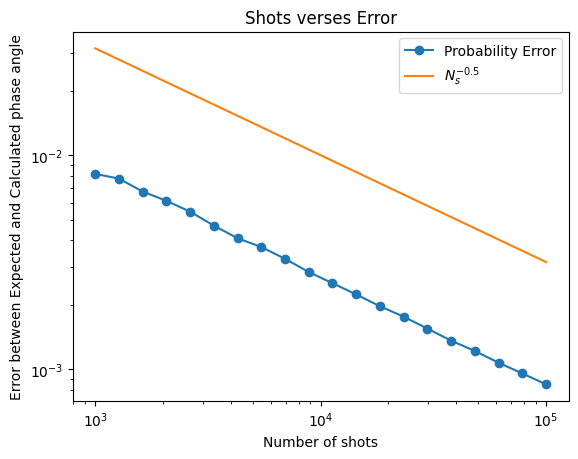

In [35]:
plt.loglog(trials, error_diff, label = 'Probability Error',marker='o')
plt.loglog(trials, Ns, label = '$N_s^{-0.5}$')
plt.title("Shots verses Error")
plt.xlabel("Number of shots")
plt.ylabel("Error between Expected and Calculated phase angle")
plt.legend(loc='upper right')
plt.show()

|Shot Count | Estim. Angle $\theta$ | Error | 
| --- | --- | --- |
| 100 | 0.4027 | 0.1598 | 
| 500 | 0.4864 | 0.0761 |
| 1000 | 0.5394 | 0.0231 |
| 5000 | 0.5830 | 0.0205 |
| 10000 | 0.5698 | 0.0073 |
| 50000 | 0.5569 | 0.0056 |
| 100000 | 0.5620 | 0.0005 |